# Simple Image Trade : Seller Side

The code below places an image for sale on a predefined address on the dopamine network, in return of at least 100 DOPA weis

for running this sample we need the dopapy library.

In [1]:
import dopapy
import dopapy.trading as dp
import dopapy.types as dd

In [2]:
from PIL import Image #used to display the image

In [3]:
import warnings
warnings.filterwarnings('ignore') #Thats just to ignore warnings that are irrelevant for this type of sample

The Image to be sold:

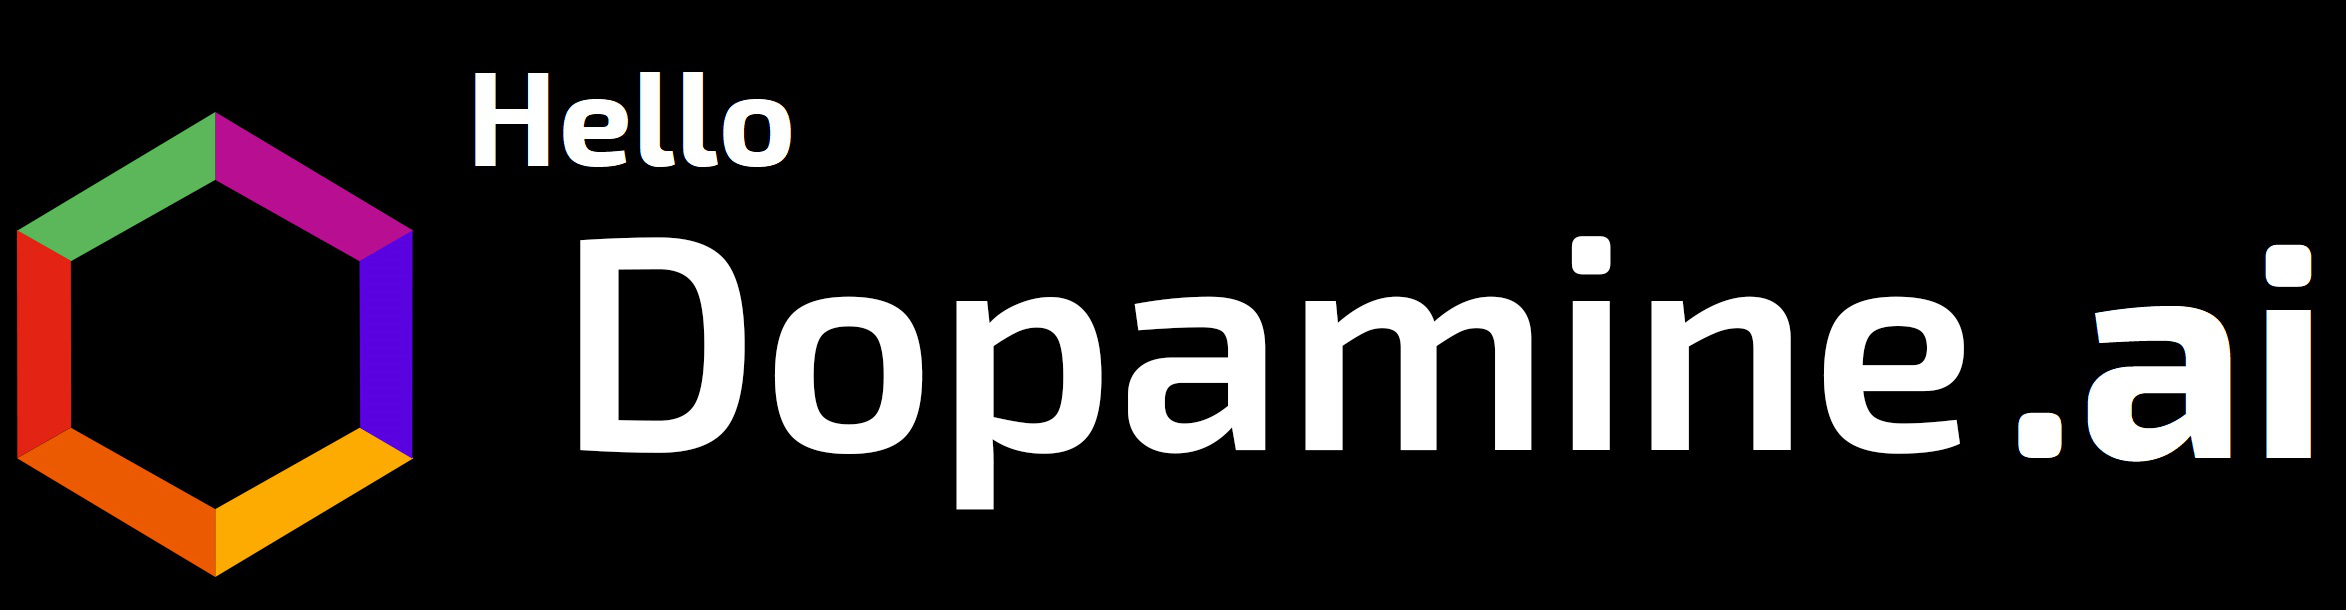

In [4]:
IMAGE_PATH = '../img/Hello-dopamine-ai.jpg'
myImage = Image.open(IMAGE_PATH)
myImage

Creating a session object that represents the service hosted by the user.
This session will have access to a local Ethereum wallet

In [5]:
session = dp.create_session(master_password='password123456',
                            keystore_dir='/data/dopamine/keystore_dir_b/',
                            web_server_host="127.0.0.1",
                            dopmn_budget=0,  # Do not allow to spend DOPAs from this account
                            ether_budget=int(10E18),
                            web_server_port=8001)

Checking balance before the trade:

In [6]:
print('DOPA Balance:',session.wallet.dopmn_balance)
print('ETH  Balance:',session.wallet.ether_balance)

DOPA Balance: 1000000000010402
ETH  Balance: 10000000000000000000


Code for actually delivering the given Image

In [7]:
def my_image_exporter():
    """
    :return: the Image to be sold
    """
    return dd.Image(IMAGE_PATH)

Describing the service for sale : providing an Image at a given size

In [8]:
my_service_descriptor = dd.ServiceDescriptor(
    output_descriptors=[dd.ImageDescriptor(pixel_size=myImage.size)],
    service_callback=my_image_exporter
)

Creating a quote for selling the given image for at least 100 DOPA weis

In [9]:
quote = dp.create_quote(
    session=session,
    service_descriptor=my_service_descriptor,
    side=dp.SELL,
    reward_descriptor=dp.create_reward_descriptor(min_gas_price=int(75E9), min_dopamine_price=int(100)))

Placing the quote on the dopamine network, waiting for buyers

In [10]:
dp.place([quote])

Here you need to wait for the other side to purchase...

<img src='../img/waiting.png'>

Checking balance after the trade:

In [11]:
print('DOPA Balance:',session.wallet.dopmn_balance)
print('ETH  Balance:',session.wallet.ether_balance)

DOPA Balance: 1000000000010502
ETH  Balance: 10000000000000000000
